In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Data - import the necessary libraries (e.g., Pandas) 
# to read your data from a file (e.g., CSV) or a database.

df = pd.read_csv('real-estate.csv')

In [2]:
# 2. Basic Data Exploration - Check the first few rows of the dataset 
# to get an initial sense of the data's structure.

df.head()


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
# 3. Data Summary - Generate descriptive statistics for the data, including mean, median, 
# standard deviation, and quartiles, to understand the central tendency and spread of the data.

df.describe()


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [4]:
#4. Data Information - check the data types of each column, 
# the number of non-null values, and memory usage.

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [6]:
import numpy as np

# 5. Handling Missing Data - identify and handle missing values using techniques 
# like imputation or removal.

# Identify missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Handle missing values using mean, excluding non-numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Verify that missing values are handled
missing_values_after = df.isnull().sum()
print("\nMissing Values After Handling:")
print(missing_values_after)


Missing Values:
No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

Missing Values After Handling:
No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


In [7]:
# 6. Feature Engineering (if needed) - is the process of creating new features or 
# modifying existing ones to improve the performance of machine learning 

# function to remove punctuation and stopwords
def text_process(text):
    non_punc = [char for char in text if char not in string.punctuation]
    non_punc=''.join(non_punc)
    return [word for word in non_punc.split() if word not in stopwords.words('english')]

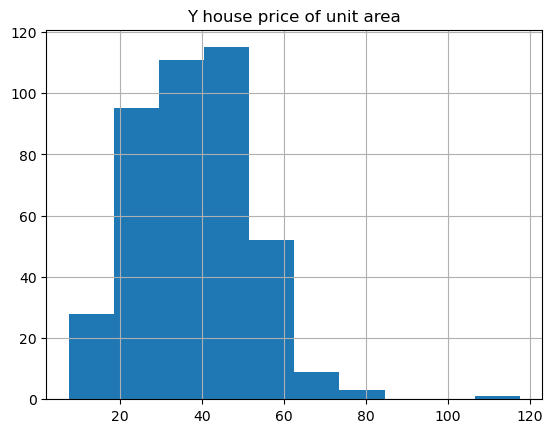

In [10]:
# 7. Data Visualization - Create visualizations to explore data distributions, relationships, and patterns. 
#Use libraries like Matplotlib and Seaborn.

#a. Univariate plots focus on a single variable or feature at a time. 
#They are used to visualize the distribution and characteristics of individual variables in isolation.

#Histogram 
df.hist('Y house price of unit area')
plt.show()

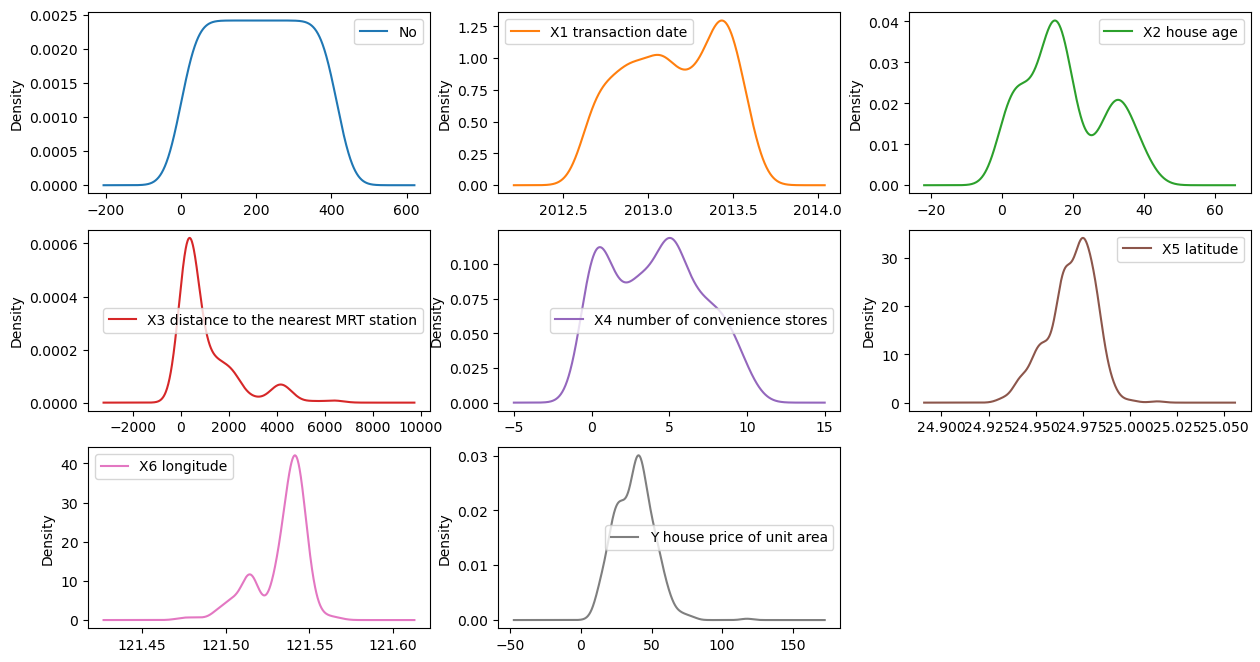

In [11]:
# Density Plots
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(15,8))
plt.show()

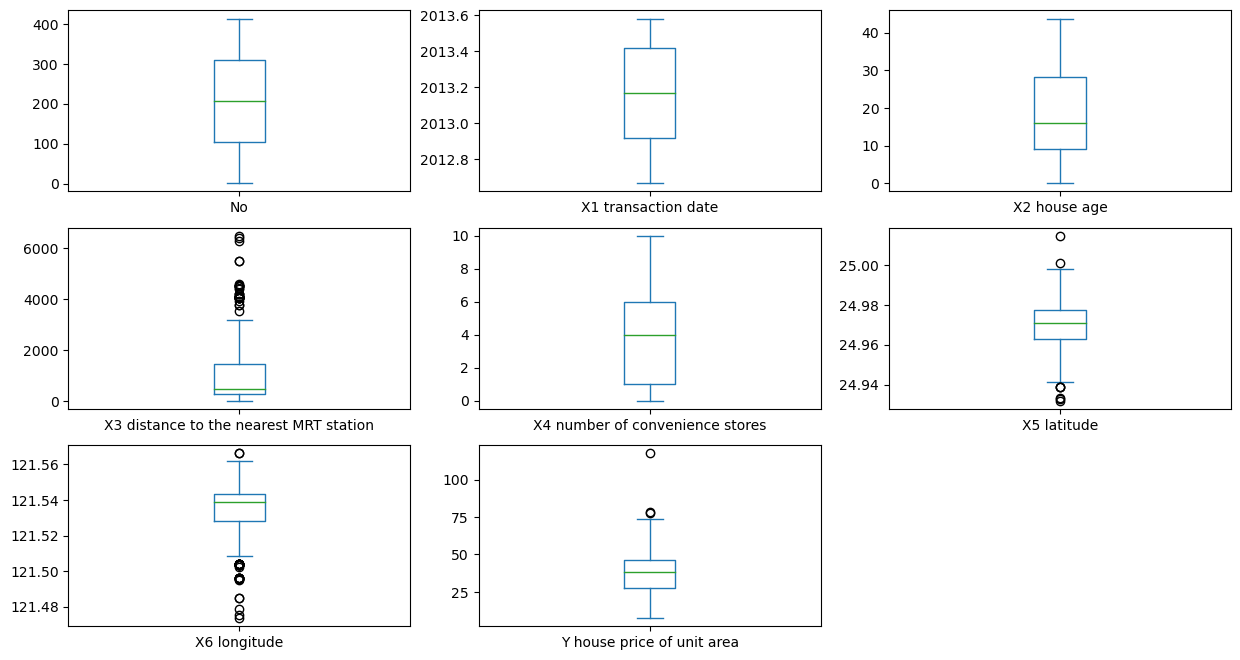

In [12]:
# Box and Whisker Plots
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,8))
plt.show()

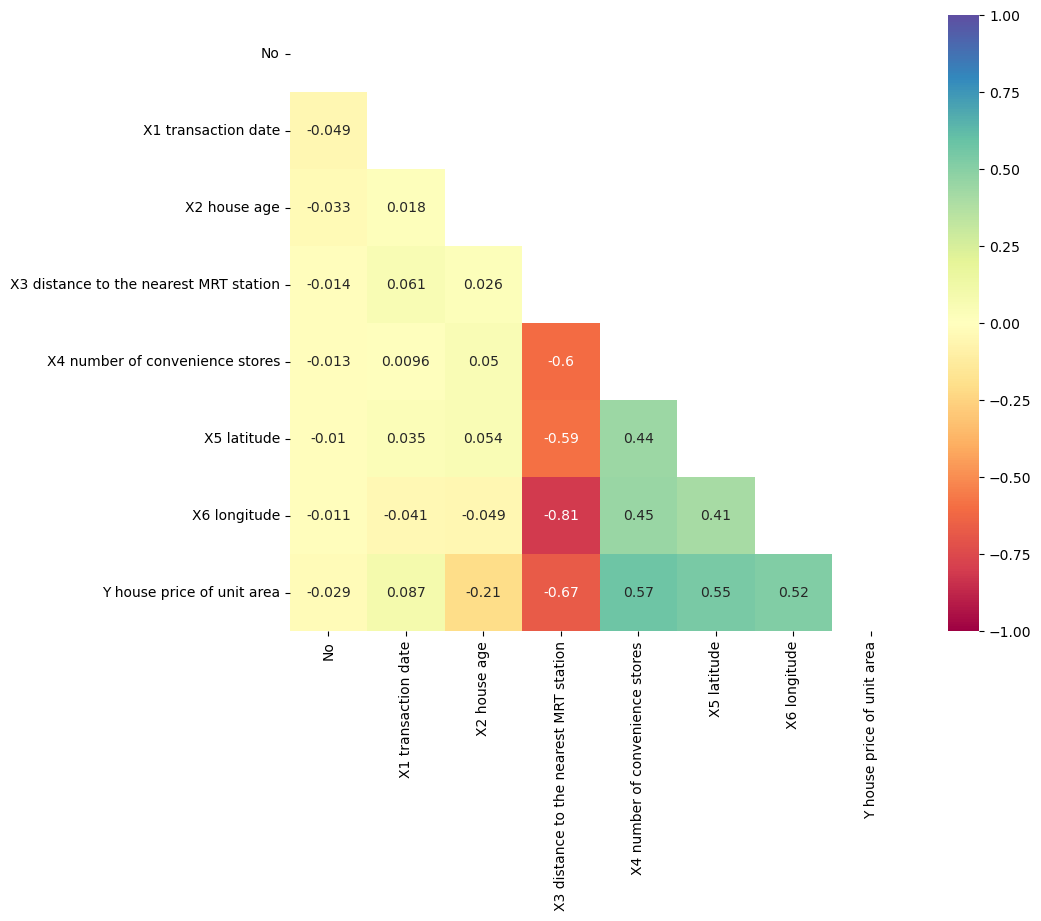

In [13]:
#Multivariate plots involve the simultaneous visualization of two or more variables to explore relationships, 
# correlations, and patterns among them.


#method: {‘pearson’, ‘kendall’, ‘spearman’}
correlations = df.corr(method='pearson') # correlation matrix

# correlation matrix plot
import seaborn as sns
import numpy as np

matrix = np.triu(correlations)
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations, annot=True, vmin=-1, vmax=1, center=0, cmap='Spectral', mask=matrix)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


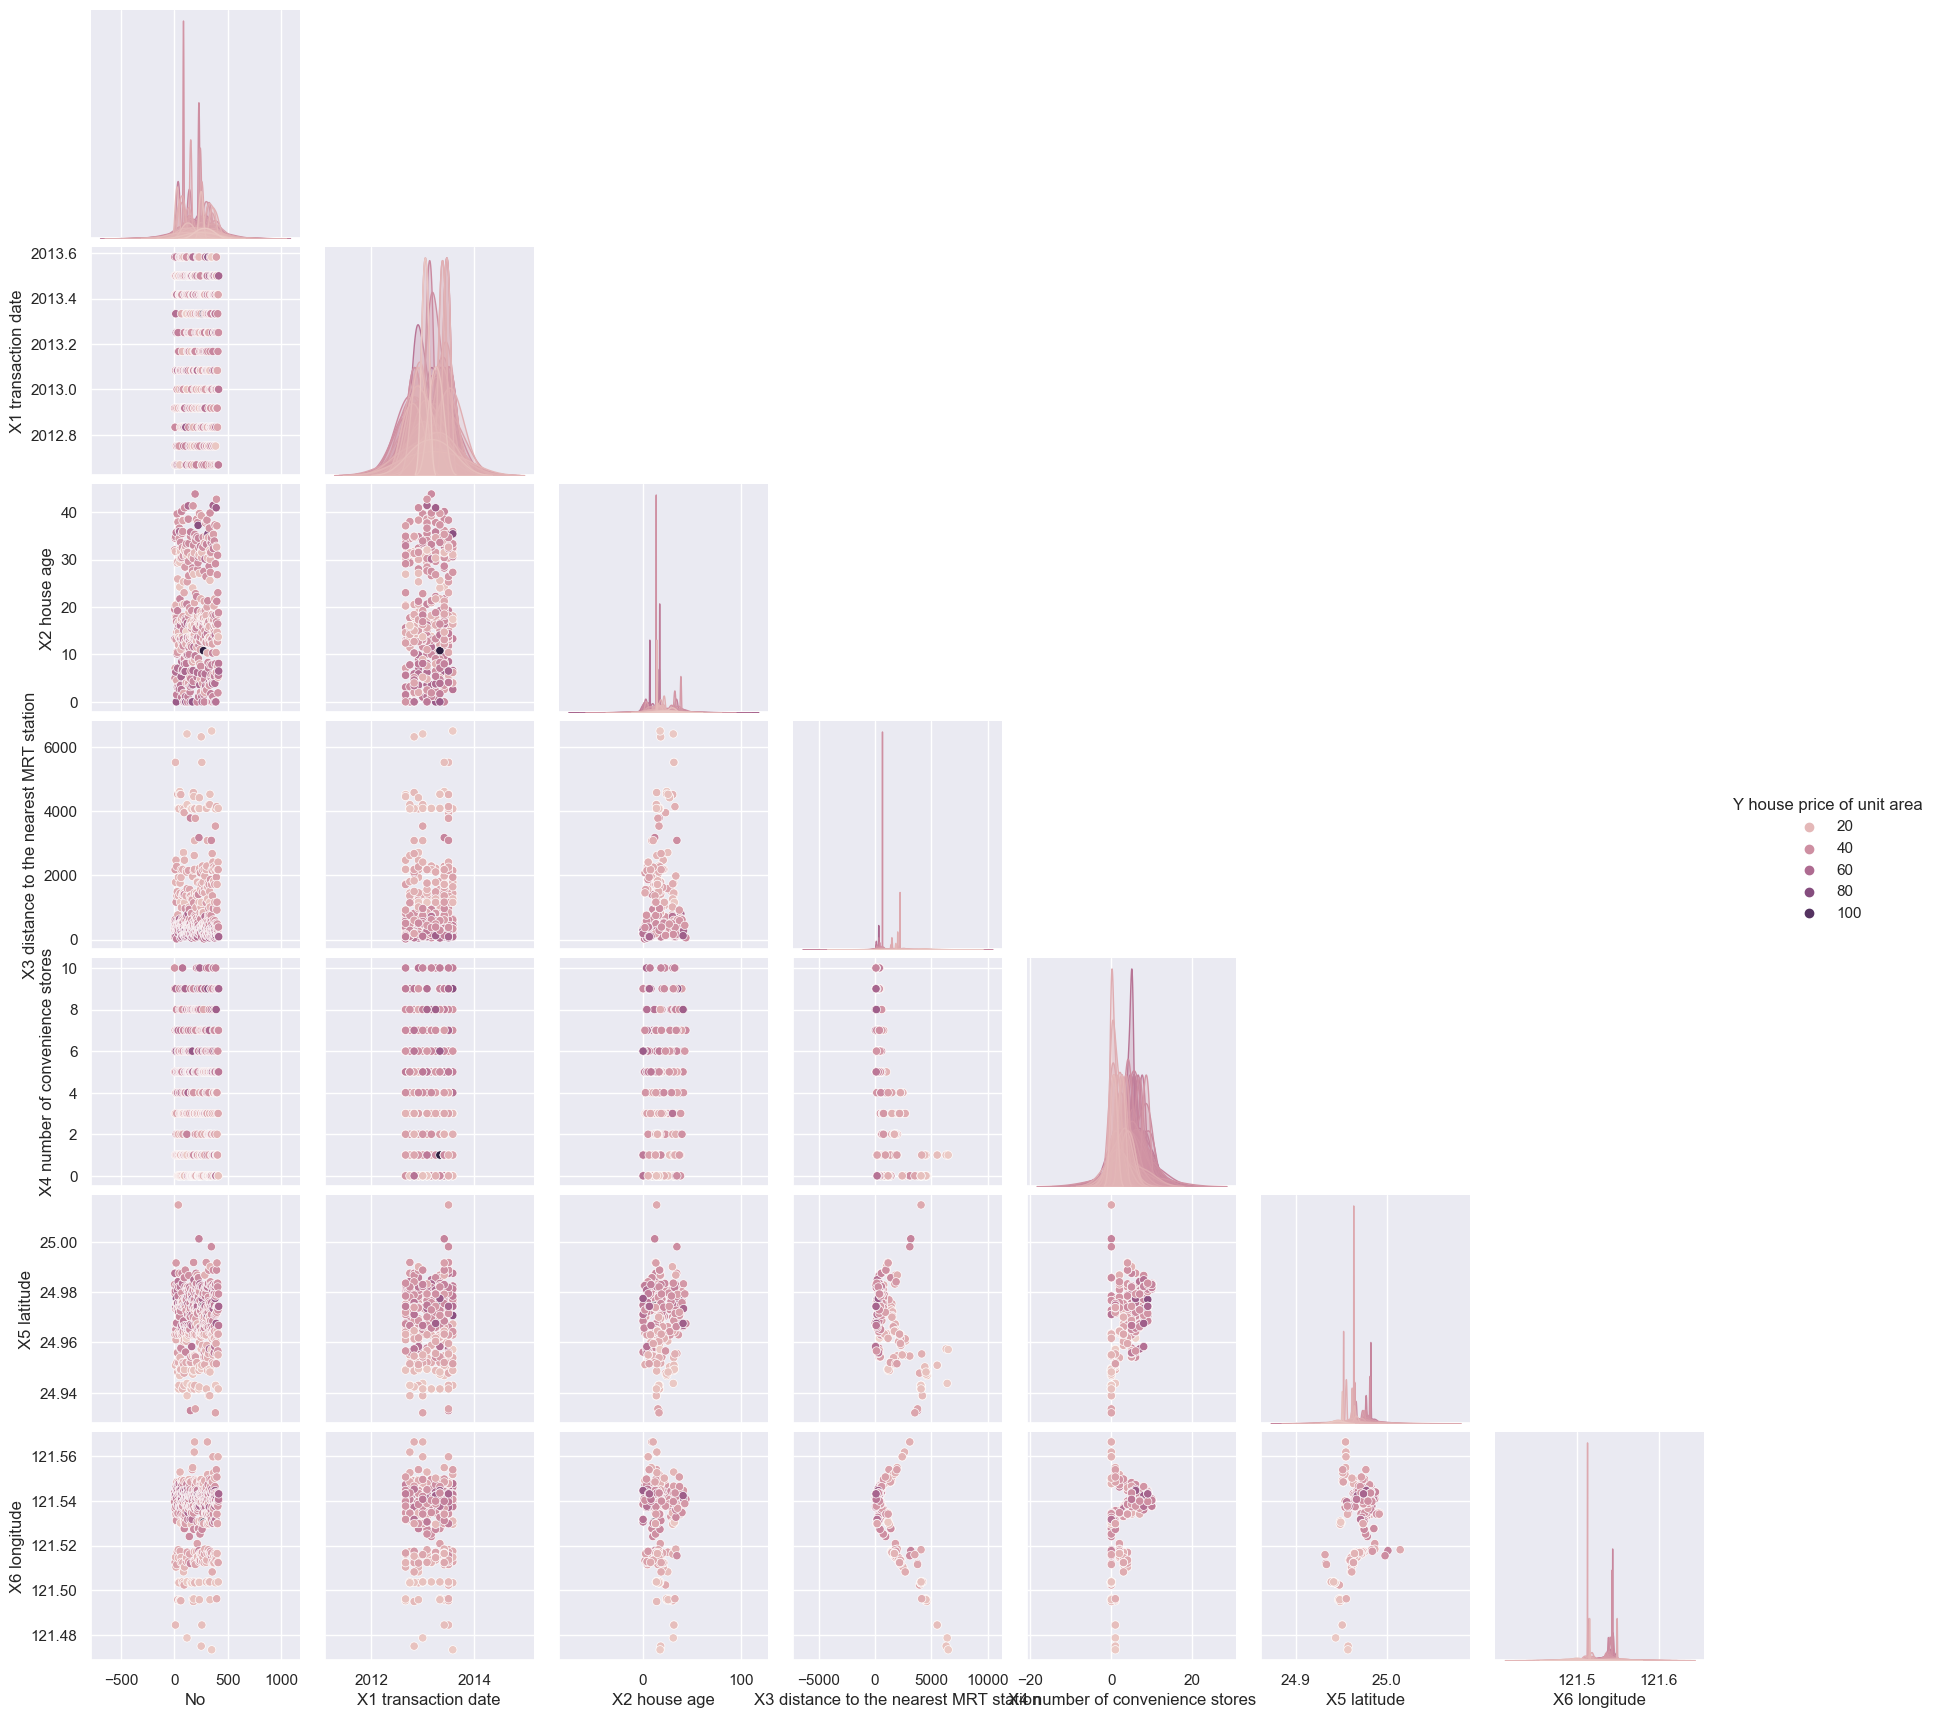

In [15]:
#Scatter Plot Matrix

sns.set_theme()
sns.pairplot(df, corner=True, hue='Y house price of unit area')
plt.show()

      No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                             10.0   
1                                 306.59470                              9.0   
2                                 561.98450                              5.0   
3                                 561.98450                              5.0   
4                                 3

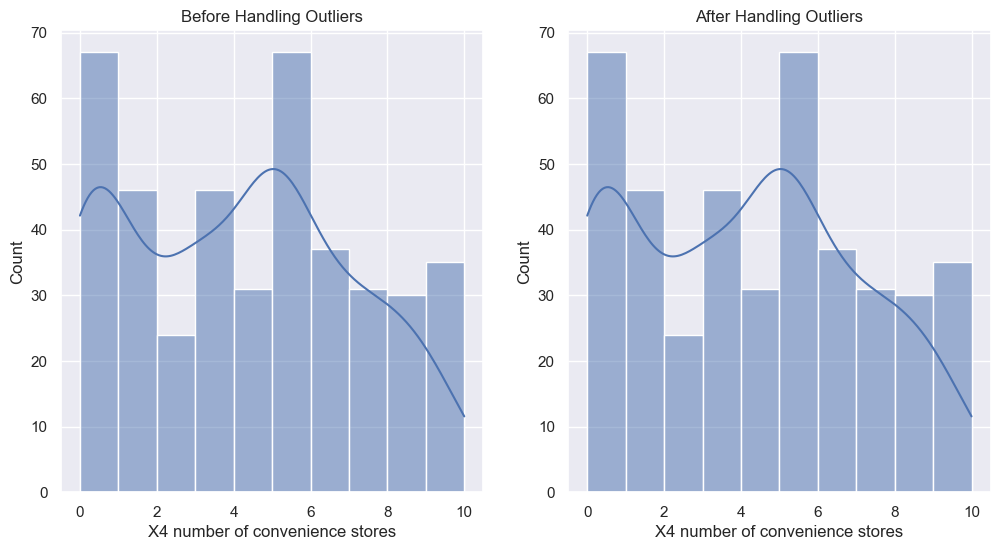

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Assuming 'Y house price of unit area' is the column with outliers
column_name = 'X4 number of convenience stores'

# Calculate z-scores
z_scores = np.abs(stats.zscore(df[column_name]))

# Define a threshold
threshold = 3

# Remove outliers and create a new DataFrame without outliers
df_no_outliers = df[(z_scores < threshold)]

# Alternatively, you can replace outliers with NaN in the original DataFrame
df[column_name] = np.where(z_scores < threshold, df[column_name], np.nan)

# Display the DataFrame without outliers
print(df_no_outliers)

# Plot the original distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Before Handling Outliers')
sns.histplot(df[column_name].dropna(), kde=True)

# Plot the distribution without outliers
plt.subplot(1, 2, 2)
plt.title('After Handling Outliers')
sns.histplot(df_no_outliers[column_name].dropna(), kde=True)

plt.show()

In [18]:
# 9. Summary and Insights

No missing values found. Proceeding with EDA.
Descriptive Statistics:
               No  X1 transaction date  X2 house age  \
count  414.000000           414.000000    414.000000   
mean   207.500000          2013.148971     17.712560   
std    119.655756             0.281967     11.392485   
min      1.000000          2012.667000      0.000000   
25%    104.250000          2012.917000      9.025000   
50%    207.500000          2013.167000     16.100000   
75%    310.750000          2013.417000     28.150000   
max    414.000000          2013.583000     43.800000   

       X3 distance to the nearest MRT station  \
count                              414.000000   
mean                              1083.885689   
std                               1262.109595   
min                                 23.382840   
25%                                289.324800   
50%                                492.231300   
75%                               1454.279000   
max                              

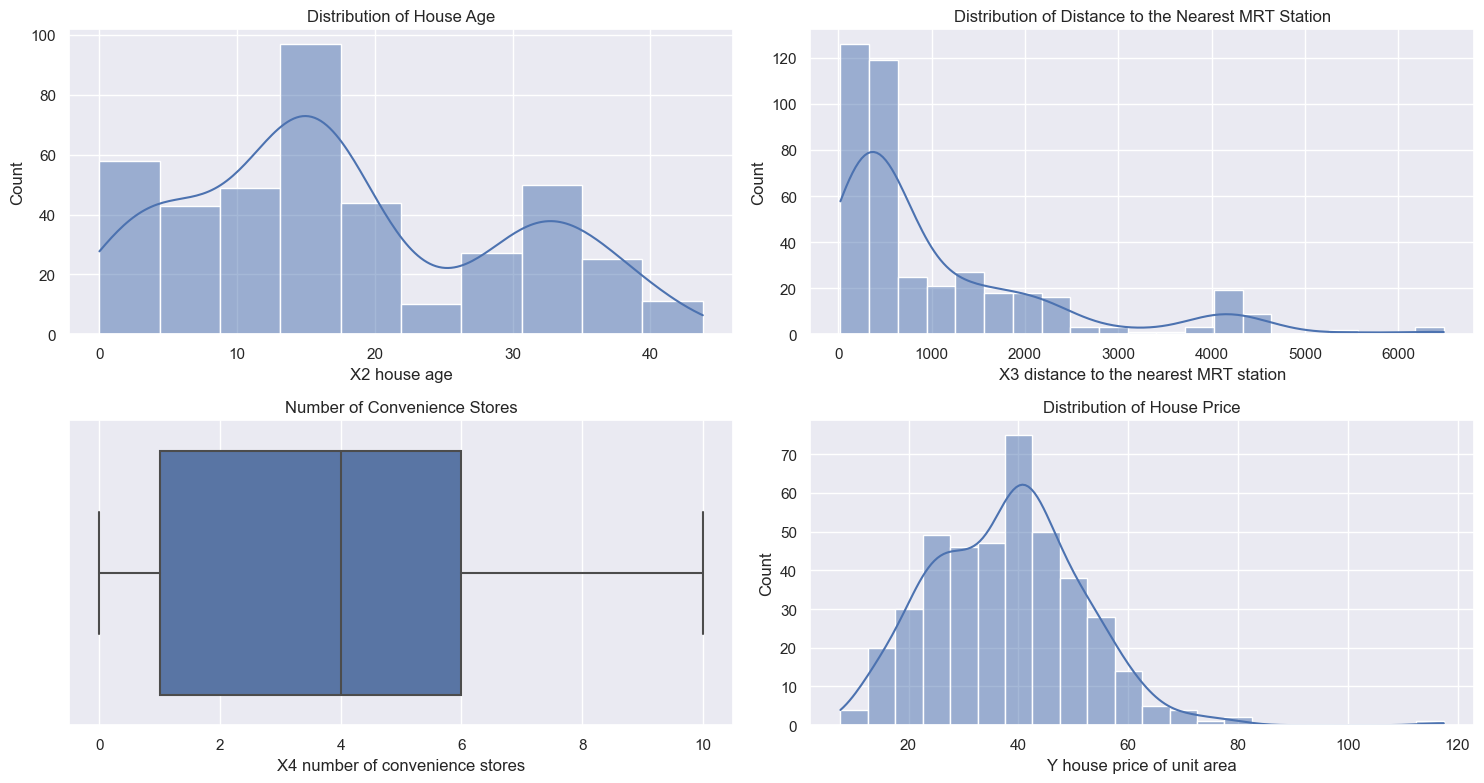

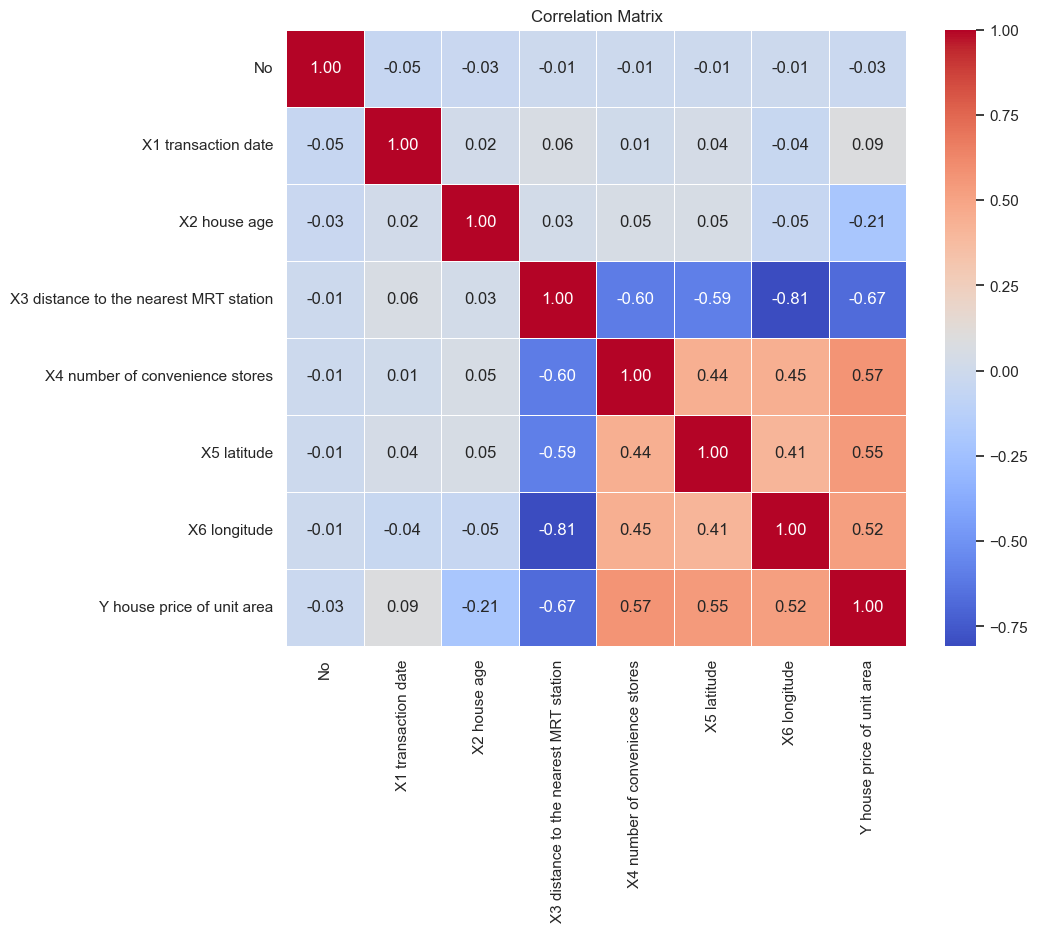

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


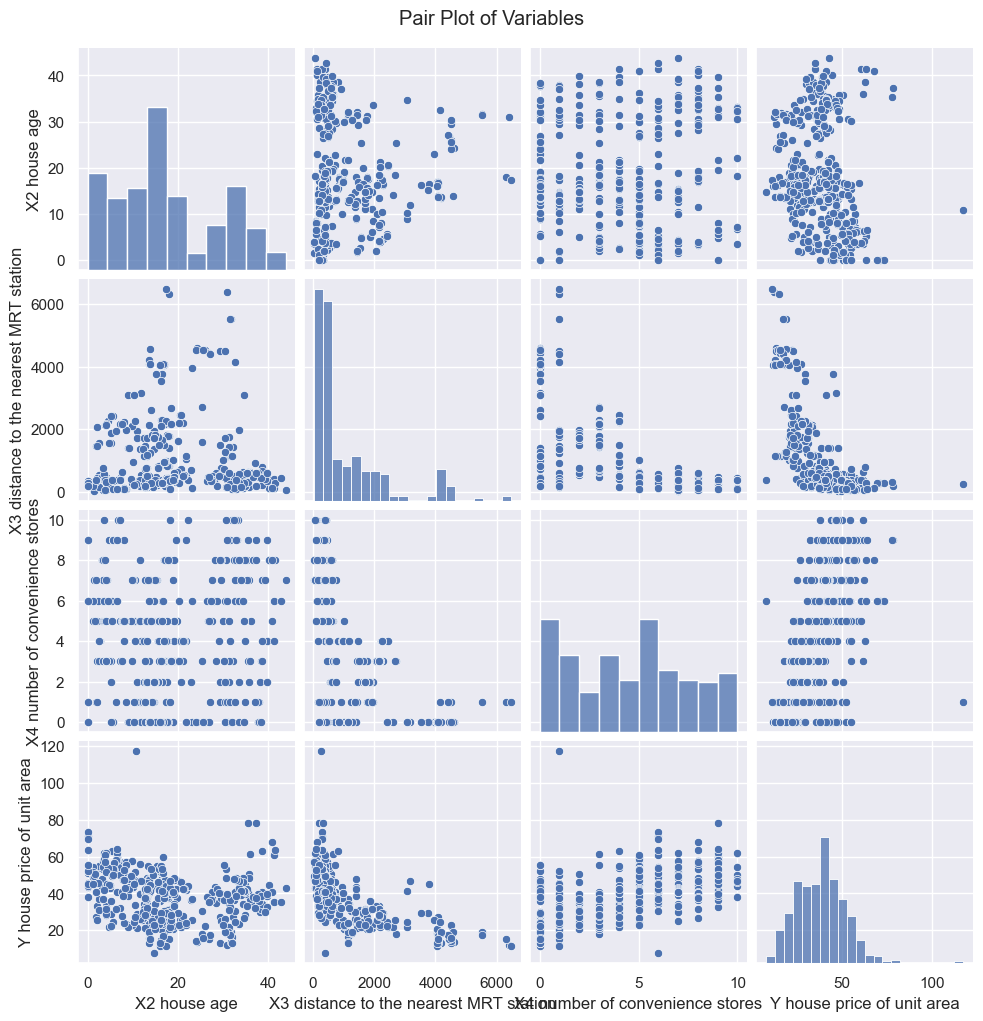

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the Data - import the necessary libraries (e.g., Pandas) 
# to read your data from a file (e.g., CSV) or a database.

df = pd.read_csv('real-estate.csv')

# Assuming 'df' is your DataFrame
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values, if any
columns_with_missing_values = missing_values[missing_values > 0].index
if not columns_with_missing_values.empty:
    print("Columns with missing values:")
    print(columns_with_missing_values)
    # If there are missing values, you can handle them (replace, drop, impute) before EDA
    # Example: Replace missing values with mean
    df.fillna(df.mean(), inplace=True)
else:
    print("No missing values found. Proceeding with EDA.")

# 1. Descriptive statistics
descriptive_stats = df.describe()
print("Descriptive Statistics:")
print(descriptive_stats)

# 2. Data distribution visualizations (histograms, box plots)
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
sns.histplot(df['X2 house age'], kde=True)
plt.title('Distribution of House Age')

plt.subplot(2, 2, 2)
sns.histplot(df['X3 distance to the nearest MRT station'], kde=True)
plt.title('Distribution of Distance to the Nearest MRT Station')

plt.subplot(2, 2, 3)
sns.boxplot(x=df['X4 number of convenience stores'])
plt.title('Number of Convenience Stores')

plt.subplot(2, 2, 4)
sns.histplot(df['Y house price of unit area'], kde=True)
plt.title('Distribution of House Price')

plt.tight_layout()
plt.show()

# 3. Correlation analysis
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# 4. Multivariate analysis
# Scatter plots or pair plots for multivariate analysis
sns.pairplot(df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'Y house price of unit area']])
plt.suptitle('Pair Plot of Variables', y=1.02)
plt.show()

# 5. Outlier detection and handling (if not handled previously)
# Example: Removing outliers using z-score
from scipy import stats
z_scores = np.abs(stats.zscore(df['Y house price of unit area']))
threshold = 3
df_no_outliers = df[(z_scores < threshold)]

# 6. Insights and patterns
# Analyze and interpret the visualizations and statistics to gain insights

# Feel free to customize and extend the analysis based on your specific goals and dataset characteristics.
